In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
%matplotlib inline

### Cargar los datos en un DataFrame:
Abro en un DataFrame los datos de la demanda de energía eléctrica de Baleares entre 2016 y 2019.
Los datos tienen una frecuencia horaria.

In [4]:
demanda = pd.read_csv('Datos_sin_tratar/demanda_baleares_16-19.csv', sep = ';')

In [5]:
demanda

,id,name,geoid,geoname,value,datetime
0,10244,Demanda en Baleares,NaN,NaN,487.174,2016-01-01T00:00:00+01:00
1,10244,Demanda en Baleares,NaN,NaN,459.223,2016-01-01T01:00:00+01:00
2,10244,Demanda en Baleares,NaN,NaN,428.181,2016-01-01T02:00:00+01:00
3,10244,Demanda en Baleares,NaN,NaN,400.044,2016-01-01T03:00:00+01:00
4,10244,Demanda en Baleares,NaN,NaN,379.334,2016-01-01T04:00:00+01:00
...,...,...,...,...,...,...
35059,10244,Demanda en Baleares,NaN,NaN,845.089,2019-12-31T19:00:00+01:00
35060,10244,Demanda en Baleares,NaN,NaN,801.779,2019-12-31T20:00:00+01:00
35061,10244,Demanda en Baleares,NaN,NaN,709.272,2019-12-31T21:00:00+01:00
35062,10244,Demanda en Baleares,NaN,NaN,625.302,2019-12-31T22:00:00+01:00


In [6]:
demanda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 6 columns):
id          35064 non-null int64
name        35064 non-null object
geoid       0 non-null float64
geoname     0 non-null float64
value       35064 non-null float64
datetime    35064 non-null object
dtypes: float64(3), int64(1), object(2)
memory usage: 1.6+ MB


#### Elimino del DataFrame las siguientes columnas:
1. geoid: Todo NaN.
2. geoname: Todo NaN.
3. id: No son necesarias al ser todos los datos de la misma zona.
4. name: No son necesarias al ser todos los datos de la misma zona.

In [7]:
demanda.drop(['name', 'geoid', 'id', 'geoname'], axis = 1, inplace = True)

In [8]:
demanda

,value,datetime
0,487.174,2016-01-01T00:00:00+01:00
1,459.223,2016-01-01T01:00:00+01:00
2,428.181,2016-01-01T02:00:00+01:00
3,400.044,2016-01-01T03:00:00+01:00
4,379.334,2016-01-01T04:00:00+01:00
...,...,...
35059,845.089,2019-12-31T19:00:00+01:00
35060,801.779,2019-12-31T20:00:00+01:00
35061,709.272,2019-12-31T21:00:00+01:00
35062,625.302,2019-12-31T22:00:00+01:00


In [9]:
demanda.describe()

,value
count,35064.000000
mean,684.751884
std,197.314391
min,332.735000
25%,543.797250
50%,670.520500
75%,790.624500
max,1344.449000


#### Hago análisis de los datos con algunos graficos:

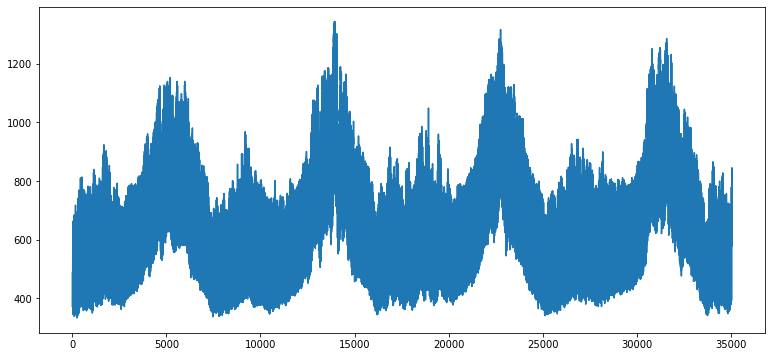

In [10]:
plt.figure(figsize = (13, 6))
plt.plot(demanda['value'])

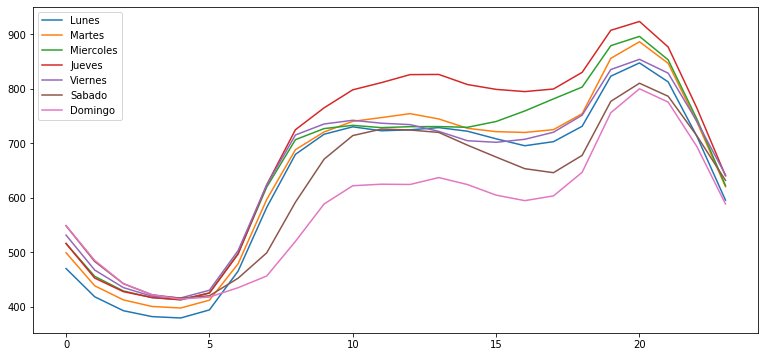

In [11]:
plt.figure(figsize=(13, 6))
plt.plot(range(0, 24),demanda[(demanda['datetime'] >= '2016-03-07') & (demanda['datetime'] < '2016-03-08')]["value"], label = 'Lunes')
plt.plot(range(0, 24),demanda[(demanda['datetime'] >= '2016-03-08') & (demanda['datetime'] < '2016-03-09')]["value"], label = 'Martes')
plt.plot(range(0, 24),demanda[(demanda['datetime'] >= '2016-03-09') & (demanda['datetime'] < '2016-03-10')]["value"], label = 'Miercoles')
plt.plot(range(0, 24),demanda[(demanda['datetime'] >= '2016-03-10') & (demanda['datetime'] < '2016-03-11')]["value"], label = 'Jueves')
plt.plot(range(0, 24),demanda[(demanda['datetime'] >= '2016-03-11') & (demanda['datetime'] < '2016-03-12')]["value"], label = 'Viernes')
plt.plot(range(0, 24),demanda[(demanda['datetime'] >= '2016-03-12') & (demanda['datetime'] < '2016-03-13')]["value"], label = 'Sabado')
plt.plot(range(0, 24),demanda[(demanda['datetime'] >= '2016-03-13') & (demanda['datetime'] < '2016-03-14')]["value"], label = 'Domingo')
plt.legend(loc = 'upper left')

#### Añado como variables el año, mes y día:

In [12]:
año = demanda['datetime'].str.split('-').apply(lambda x: x[0])
mes = demanda['datetime'].str.split('-').apply(lambda x: x[1])
dia = demanda['datetime'].str.split('-').apply(lambda x: x[2]).str.split('T').apply(lambda y: y[0])

In [13]:
demanda['año'] = año
demanda['mes'] = mes
demanda['dia'] = dia
demanda['año'] = demanda['año'].apply(lambda x: int(x))
demanda['mes'] = demanda['mes'].apply(lambda x: int(x))
demanda['dia'] = demanda['dia'].apply(lambda x: int(x))

In [14]:
demanda

,value,datetime,año,mes,dia
0,487.174,2016-01-01T00:00:00+01:00,2016,1,1
1,459.223,2016-01-01T01:00:00+01:00,2016,1,1
2,428.181,2016-01-01T02:00:00+01:00,2016,1,1
3,400.044,2016-01-01T03:00:00+01:00,2016,1,1
4,379.334,2016-01-01T04:00:00+01:00,2016,1,1
...,...,...,...,...,...
35059,845.089,2019-12-31T19:00:00+01:00,2019,12,31
35060,801.779,2019-12-31T20:00:00+01:00,2019,12,31
35061,709.272,2019-12-31T21:00:00+01:00,2019,12,31
35062,625.302,2019-12-31T22:00:00+01:00,2019,12,31


In [15]:
demanda['datetime_utc'] = demanda['datetime']

In [16]:
demanda['datetime'] = demanda['datetime'].str.split('+').apply(lambda x: x[0])

In [17]:
demanda

,value,datetime,año,mes,dia,datetime_utc
0,487.174,2016-01-01T00:00:00,2016,1,1,2016-01-01T00:00:00+01:00
1,459.223,2016-01-01T01:00:00,2016,1,1,2016-01-01T01:00:00+01:00
2,428.181,2016-01-01T02:00:00,2016,1,1,2016-01-01T02:00:00+01:00
3,400.044,2016-01-01T03:00:00,2016,1,1,2016-01-01T03:00:00+01:00
4,379.334,2016-01-01T04:00:00,2016,1,1,2016-01-01T04:00:00+01:00
...,...,...,...,...,...,...
35059,845.089,2019-12-31T19:00:00,2019,12,31,2019-12-31T19:00:00+01:00
35060,801.779,2019-12-31T20:00:00,2019,12,31,2019-12-31T20:00:00+01:00
35061,709.272,2019-12-31T21:00:00,2019,12,31,2019-12-31T21:00:00+01:00
35062,625.302,2019-12-31T22:00:00,2019,12,31,2019-12-31T22:00:00+01:00


#### Transformo las fechas a formato fecha:

In [18]:
demanda['datetime'] = pd.to_datetime(demanda['datetime'])
demanda['datetime_utc'] = pd.to_datetime(demanda['datetime_utc'])

#### Creo la variable dia_semana:

In [19]:
demanda['dia_semana'] = demanda['datetime'].dt.weekday_name

In [20]:
demanda

,value,datetime,año,mes,dia,datetime_utc,dia_semana
0,487.174,2016-01-01 00:00:00,2016,1,1,2016-01-01 00:00:00+01:00,Friday
1,459.223,2016-01-01 01:00:00,2016,1,1,2016-01-01 01:00:00+01:00,Friday
2,428.181,2016-01-01 02:00:00,2016,1,1,2016-01-01 02:00:00+01:00,Friday
3,400.044,2016-01-01 03:00:00,2016,1,1,2016-01-01 03:00:00+01:00,Friday
4,379.334,2016-01-01 04:00:00,2016,1,1,2016-01-01 04:00:00+01:00,Friday
...,...,...,...,...,...,...,...
35059,845.089,2019-12-31 19:00:00,2019,12,31,2019-12-31 19:00:00+01:00,Tuesday
35060,801.779,2019-12-31 20:00:00,2019,12,31,2019-12-31 20:00:00+01:00,Tuesday
35061,709.272,2019-12-31 21:00:00,2019,12,31,2019-12-31 21:00:00+01:00,Tuesday
35062,625.302,2019-12-31 22:00:00,2019,12,31,2019-12-31 22:00:00+01:00,Tuesday


#### Genero variables dummies para los días de la semana y los meses:

In [21]:
demanda = demanda.join(pd.get_dummies(demanda['dia_semana']))

In [22]:
demanda

,value,datetime,año,mes,dia,datetime_utc,dia_semana,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,487.174,2016-01-01 00:00:00,2016,1,1,2016-01-01 00:00:00+01:00,Friday,1,0,0,0,0,0,0
1,459.223,2016-01-01 01:00:00,2016,1,1,2016-01-01 01:00:00+01:00,Friday,1,0,0,0,0,0,0
2,428.181,2016-01-01 02:00:00,2016,1,1,2016-01-01 02:00:00+01:00,Friday,1,0,0,0,0,0,0
3,400.044,2016-01-01 03:00:00,2016,1,1,2016-01-01 03:00:00+01:00,Friday,1,0,0,0,0,0,0
4,379.334,2016-01-01 04:00:00,2016,1,1,2016-01-01 04:00:00+01:00,Friday,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,845.089,2019-12-31 19:00:00,2019,12,31,2019-12-31 19:00:00+01:00,Tuesday,0,0,0,0,0,1,0
35060,801.779,2019-12-31 20:00:00,2019,12,31,2019-12-31 20:00:00+01:00,Tuesday,0,0,0,0,0,1,0
35061,709.272,2019-12-31 21:00:00,2019,12,31,2019-12-31 21:00:00+01:00,Tuesday,0,0,0,0,0,1,0
35062,625.302,2019-12-31 22:00:00,2019,12,31,2019-12-31 22:00:00+01:00,Tuesday,0,0,0,0,0,1,0


In [23]:
demanda['nombre_mes'] = demanda['datetime'].dt.month_name()

In [24]:
demanda

,value,datetime,año,mes,dia,datetime_utc,dia_semana,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,nombre_mes
0,487.174,2016-01-01 00:00:00,2016,1,1,2016-01-01 00:00:00+01:00,Friday,1,0,0,0,0,0,0,January
1,459.223,2016-01-01 01:00:00,2016,1,1,2016-01-01 01:00:00+01:00,Friday,1,0,0,0,0,0,0,January
2,428.181,2016-01-01 02:00:00,2016,1,1,2016-01-01 02:00:00+01:00,Friday,1,0,0,0,0,0,0,January
3,400.044,2016-01-01 03:00:00,2016,1,1,2016-01-01 03:00:00+01:00,Friday,1,0,0,0,0,0,0,January
4,379.334,2016-01-01 04:00:00,2016,1,1,2016-01-01 04:00:00+01:00,Friday,1,0,0,0,0,0,0,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,845.089,2019-12-31 19:00:00,2019,12,31,2019-12-31 19:00:00+01:00,Tuesday,0,0,0,0,0,1,0,December
35060,801.779,2019-12-31 20:00:00,2019,12,31,2019-12-31 20:00:00+01:00,Tuesday,0,0,0,0,0,1,0,December
35061,709.272,2019-12-31 21:00:00,2019,12,31,2019-12-31 21:00:00+01:00,Tuesday,0,0,0,0,0,1,0,December
35062,625.302,2019-12-31 22:00:00,2019,12,31,2019-12-31 22:00:00+01:00,Tuesday,0,0,0,0,0,1,0,December


In [25]:
demanda = demanda.join(pd.get_dummies(demanda['nombre_mes']))

In [26]:
demanda

,value,datetime,año,mes,dia,datetime_utc,dia_semana,Friday,Monday,Saturday,...,December,February,January,July,June,March,May,November,October,September
0,487.174,2016-01-01 00:00:00,2016,1,1,2016-01-01 00:00:00+01:00,Friday,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,459.223,2016-01-01 01:00:00,2016,1,1,2016-01-01 01:00:00+01:00,Friday,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,428.181,2016-01-01 02:00:00,2016,1,1,2016-01-01 02:00:00+01:00,Friday,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,400.044,2016-01-01 03:00:00,2016,1,1,2016-01-01 03:00:00+01:00,Friday,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,379.334,2016-01-01 04:00:00,2016,1,1,2016-01-01 04:00:00+01:00,Friday,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,845.089,2019-12-31 19:00:00,2019,12,31,2019-12-31 19:00:00+01:00,Tuesday,0,0,0,...,1,0,0,0,0,0,0,0,0,0
35060,801.779,2019-12-31 20:00:00,2019,12,31,2019-12-31 20:00:00+01:00,Tuesday,0,0,0,...,1,0,0,0,0,0,0,0,0,0
35061,709.272,2019-12-31 21:00:00,2019,12,31,2019-12-31 21:00:00+01:00,Tuesday,0,0,0,...,1,0,0,0,0,0,0,0,0,0
35062,625.302,2019-12-31 22:00:00,2019,12,31,2019-12-31 22:00:00+01:00,Tuesday,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [40]:
def festivos(fecha):
    if fecha in ['2016-01-01', '2016-01-06', '2016-12-25', '2016-03-01', '2016-03-24', '2016-03-25', '2016-03-28', '2016-08-15', '2016-10-12', '2016-11-01', '2016-12-06', '2016-12-08', '2016-12-26',
                '2017-01-01', '2017-01-06', '2017-12-25', '2017-03-01', '2017-04-13', '2017-04-14', '2017-04-17', '2017-05-01', '2017-08-15', '2017-10-12', '2017-11-01', '2017-12-06', '2017-12-08',
                '2018-01-01', '2018-01-06', '2018-12-25', '2018-03-01', '2018-03-29', '2018-03-30', '2018-04-02', '2018-05-01', '2018-08-15', '2018-10-12', '2018-11-01', '2018-12-06', '2018-12-08',
                '2019-01-01', '2019-01-06', '2019-12-25', '2019-03-01', '2019-04-18', '2019-04-19', '2019-04-22', '2019-05-01', '2019-08-15', '2019-10-12', '2019-11-01', '2019-12-06', '2019-12-26']:
        return 1
    else:
        return 0

In [41]:
demanda['fecha'] = demanda['datetime'].apply(lambda x: datetime.datetime.strftime(x, '%Y-%m-%d'))

In [42]:
demanda

,value,datetime,año,mes,dia,datetime_utc,dia_semana,Friday,Monday,Saturday,...,February,January,July,June,March,May,November,October,September,fecha
0,487.174,2016-01-01 00:00:00,2016,1,1,2016-01-01 00:00:00+01:00,Friday,1,0,0,...,0,1,0,0,0,0,0,0,0,2016-01-01
1,459.223,2016-01-01 01:00:00,2016,1,1,2016-01-01 01:00:00+01:00,Friday,1,0,0,...,0,1,0,0,0,0,0,0,0,2016-01-01
2,428.181,2016-01-01 02:00:00,2016,1,1,2016-01-01 02:00:00+01:00,Friday,1,0,0,...,0,1,0,0,0,0,0,0,0,2016-01-01
3,400.044,2016-01-01 03:00:00,2016,1,1,2016-01-01 03:00:00+01:00,Friday,1,0,0,...,0,1,0,0,0,0,0,0,0,2016-01-01
4,379.334,2016-01-01 04:00:00,2016,1,1,2016-01-01 04:00:00+01:00,Friday,1,0,0,...,0,1,0,0,0,0,0,0,0,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,845.089,2019-12-31 19:00:00,2019,12,31,2019-12-31 19:00:00+01:00,Tuesday,0,0,0,...,0,0,0,0,0,0,0,0,0,2019-12-31
35060,801.779,2019-12-31 20:00:00,2019,12,31,2019-12-31 20:00:00+01:00,Tuesday,0,0,0,...,0,0,0,0,0,0,0,0,0,2019-12-31
35061,709.272,2019-12-31 21:00:00,2019,12,31,2019-12-31 21:00:00+01:00,Tuesday,0,0,0,...,0,0,0,0,0,0,0,0,0,2019-12-31
35062,625.302,2019-12-31 22:00:00,2019,12,31,2019-12-31 22:00:00+01:00,Tuesday,0,0,0,...,0,0,0,0,0,0,0,0,0,2019-12-31


In [44]:
demanda['festivo'] = demanda['fecha'].apply(lambda x: festivos(x))
demanda

,value,datetime,año,mes,dia,datetime_utc,dia_semana,Friday,Monday,Saturday,...,January,July,June,March,May,November,October,September,fecha,festivo
0,487.174,2016-01-01 00:00:00,2016,1,1,2016-01-01 00:00:00+01:00,Friday,1,0,0,...,1,0,0,0,0,0,0,0,2016-01-01,1
1,459.223,2016-01-01 01:00:00,2016,1,1,2016-01-01 01:00:00+01:00,Friday,1,0,0,...,1,0,0,0,0,0,0,0,2016-01-01,1
2,428.181,2016-01-01 02:00:00,2016,1,1,2016-01-01 02:00:00+01:00,Friday,1,0,0,...,1,0,0,0,0,0,0,0,2016-01-01,1
3,400.044,2016-01-01 03:00:00,2016,1,1,2016-01-01 03:00:00+01:00,Friday,1,0,0,...,1,0,0,0,0,0,0,0,2016-01-01,1
4,379.334,2016-01-01 04:00:00,2016,1,1,2016-01-01 04:00:00+01:00,Friday,1,0,0,...,1,0,0,0,0,0,0,0,2016-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,845.089,2019-12-31 19:00:00,2019,12,31,2019-12-31 19:00:00+01:00,Tuesday,0,0,0,...,0,0,0,0,0,0,0,0,2019-12-31,0
35060,801.779,2019-12-31 20:00:00,2019,12,31,2019-12-31 20:00:00+01:00,Tuesday,0,0,0,...,0,0,0,0,0,0,0,0,2019-12-31,0
35061,709.272,2019-12-31 21:00:00,2019,12,31,2019-12-31 21:00:00+01:00,Tuesday,0,0,0,...,0,0,0,0,0,0,0,0,2019-12-31,0
35062,625.302,2019-12-31 22:00:00,2019,12,31,2019-12-31 22:00:00+01:00,Tuesday,0,0,0,...,0,0,0,0,0,0,0,0,2019-12-31,0
